In [ ]:
from pathlib import Path
import json

ROOT = Path("./") 

ANN_DIR = ROOT / "annotations"
IMG_DIR = ROOT / "images"

train_file = ANN_DIR / "instances_train_gps_split_with_signs.json"
val_file   = ANN_DIR / "instances_val_gps_split_with_signs.json"

print(train_file.exists(), val_file.exists())

True True


In [2]:
with open(train_file, "r") as f:
    train = json.load(f)

with open(val_file, "r") as f:
    val = json.load(f)

print("Train images:", len(train["images"]))
print("Train annotations:", len(train["annotations"]))
print("Val images:", len(val["images"]))
print("Val annotations:", len(val["annotations"]))

Train images: 5318
Train annotations: 60757
Val images: 2098
Val annotations: 21261


In [3]:
# Map image_id → image info
id2img = {img["id"]: img for img in train["images"]}

# Map category_id → name
id2cat = {c["id"]: c["name"] for c in train["categories"]}

# Group annotations by image
from collections import defaultdict
anns_by_image = defaultdict(list)

for ann in train["annotations"]:
    anns_by_image[ann["image_id"]].append(ann)

print("All categories:")
for cid, name in sorted(id2cat.items()):
    print(f"{cid:2d}  {name}")

All categories:
 1  Police Officer
 2  Police Vehicle
 3  Cone
 4  Fence
 5  Drum
 6  Barricade
 7  Barrier
 8  Work Vehicle
 9  Vertical Panel
10  Tubular Marker
11  Arrow Board
12  Bike Lane
13  Work Equipment
14  Worker
15  Other Roadwork Objects
16  Temporary Traffic Control Message Board
17  Temporary Traffic Control Sign
19  Temporary Traffic Control Sign: left arrow
20  Temporary Traffic Control Sign: right arrow
21  Temporary Traffic Control Sign: up arrow
22  Temporary Traffic Control Sign: left chevron
23  Temporary Traffic Control Sign: right lane ends sign
24  Temporary Traffic Control Sign: two lane shift arrows
25  Temporary Traffic Control Sign: right chevron
26  Temporary Traffic Control Sign: lane shift arrow
27  Temporary Traffic Control Sign: up diagonal right arrow
28  Temporary Traffic Control Sign: left lane ends sign
29  Temporary Traffic Control Sign: bent left arrow
30  Temporary Traffic Control Sign: flagger
31  Temporary Traffic Control Sign: bent right arrow

In [4]:
sample_id = train["images"][0]["id"]
sample_info = id2img[sample_id]

print(sample_info)

{'id': 1, 'width': 1920, 'height': 1080, 'file_name': 'columbus_ed065d9b86d545b2af0042a058e7e907_000002_03480.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0, 'gps': [39.95771585, -82.98556694], 'city_name': 'columbus', 'video_info': {'vid_id': 'ed065d9b86d545b2af0042a058e7e907', 'seq_id': '000002', 'frame_id': '03480.jpg'}, 'scene_level_tags': {'weather': ['Partly Cloudy'], 'travel_alteration': ['Partially Blocked'], 'daytime': 'Light', 'scene_environment': 'Urban'}, 'scene_description': 'Road closed on right intersecting road. Partially blocked by barricade. Line of drums between road lanes on road opposite intersection.'}


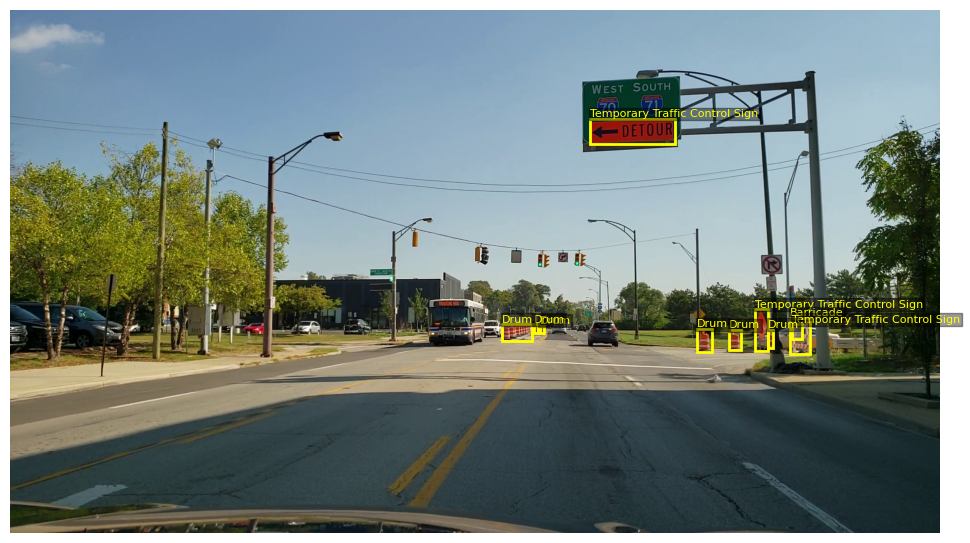

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

img_path = IMG_DIR / sample_info["file_name"]
img = Image.open(img_path).convert("RGB")

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img)

for ann in anns_by_image[sample_id]:
    cat = id2cat[ann["category_id"]]
    x, y, w, h = ann["bbox"]

    rect = patches.Rectangle((x, y), w, h, linewidth=2,
                             edgecolor="yellow", facecolor="none")
    ax.add_patch(rect)
    ax.text(x, y-4, cat, color="yellow", fontsize=8,
            bbox=dict(facecolor="black", alpha=0.4, pad=1))

plt.axis("off")
plt.show()

In [6]:
# peek at a few annotations that actually have attributes
count = 0
for ann in train["annotations"]:
    attrs = ann.get("attributes", {})
    if attrs:     # not empty
        cat_name = id2cat[ann["category_id"]]
        print("ann id:", ann["id"])
        print("  category:", cat_name)
        print("  bbox:", ann["bbox"])
        print("  attributes:", attrs)
        print()
        count += 1
        if count >= 10:
            break

ann id: 1
  category: Temporary Traffic Control Sign
  bbox: [1537.24, 617.85, 27.17, 85.1]
  attributes: {'sign_image': '', 'sign_text': '', 'text_occluded': False}

ann id: 2
  category: Drum
  bbox: [1092.81, 651.39, 8.83, 14.67]
  attributes: {'occluded': False}

ann id: 3
  category: Drum
  bbox: [1080.38, 648.99, 9.74, 18.42]
  attributes: {'occluded': False}

ann id: 4
  category: Barricade
  bbox: [1609.92, 636.22, 40.19, 73.52]
  attributes: {'occluded': False}

ann id: 5
  category: Temporary Traffic Control Sign
  bbox: [1613.89, 648.73, 20.91, 31.04]
  attributes: {'sign_image': '', 'sign_text': 'ROAD CLOSED', 'text_occluded': False}

ann id: 6
  category: Drum
  bbox: [1015.85, 648.68, 60.72, 35.39]
  attributes: {'occluded': False}

ann id: 7
  category: Temporary Traffic Control Sign
  bbox: [1197.42, 224.49, 174.4, 52.11]
  attributes: {'occluded': False}

ann id: 8
  category: Drum
  bbox: [1484.24, 660.83, 24.59, 41.72]
  attributes: {'occluded': False}

ann id: 9
  c

In [7]:
# all TTC related categories from your print
TTC_CAT_IDS = [
    16,  # Temporary Traffic Control Message Board
    17,  # Temporary Traffic Control Sign
    19, 20, 21, 22, 23, 24, 25, 26,
    27, 28, 29, 30, 31, 32, 33, 34,
    35, 36, 37, 38, 39, 40, 41, 42,
    43, 44, 45, 46, 47, 48, 49, 50
]

print("Number of TTC categories:", len(TTC_CAT_IDS))
print([id2cat[cid] for cid in TTC_CAT_IDS[:5]])

Number of TTC categories: 34
['Temporary Traffic Control Message Board', 'Temporary Traffic Control Sign', 'Temporary Traffic Control Sign: left arrow', 'Temporary Traffic Control Sign: right arrow', 'Temporary Traffic Control Sign: up arrow']


In [8]:
from dataclasses import dataclass

@dataclass
class TTCSample:
    image_id: int
    file_name: str
    category_id: int
    category_name: str
    bbox: list          # [x, y, w, h]
    sign_text: str
    text_occluded: bool

ttc_samples = []

for ann in train["annotations"]:
    cid = ann["category_id"]
    if cid not in TTC_CAT_IDS:
        continue

    img_info = id2img[ann["image_id"]]
    attrs = ann.get("attributes", {})
    sample = TTCSample(
        image_id=img_info["id"],
        file_name=img_info["file_name"],
        category_id=cid,
        category_name=id2cat[cid],
        bbox=ann["bbox"],
        sign_text=attrs.get("sign_text", ""),
        text_occluded=attrs.get("text_occluded", False),
    )
    ttc_samples.append(sample)

len(ttc_samples), ttc_samples[0]

(6941,
 TTCSample(image_id=1, file_name='columbus_ed065d9b86d545b2af0042a058e7e907_000002_03480.jpg', category_id=17, category_name='Temporary Traffic Control Sign', bbox=[1537.24, 617.85, 27.17, 85.1], sign_text='', text_occluded=False))

In [9]:
from collections import Counter

texts = [s.sign_text for s in ttc_samples]
text_counter = Counter(texts)

print("Unique sign_text values:", len(text_counter))
print("Most common:")
for txt, cnt in text_counter.most_common(20):
    print(f"{cnt:4d}  {repr(txt)}")

Unique sign_text values: 292
Most common:
4220  ''
 506  'DETOUR'
 318  'ROAD CLOSED'
 191  'ROAD WORK AHEAD'
 149  'SIDEWALK CLOSED'
 117  'LANE CLOSED'
  81  'WORK ZONE'
  50  'SLOW'
  47  'TRUCK DETOUR'
  44  'DETOUR AHEAD'
  38  'RIGHT LANE CLOSED AHEAD'
  36  'ROAD CLOSED AHEAD'
  32  'UTILITY WORK AHEAD'
  30  'ROAD CLOSED TO THRU TRAFFIC'
  30  'LIBERTY BRIDGE'
  29  'RAMP CLOSED'
  24  'END DETOUR'
  23  'LANES SHIFT AHEAD'
  22  'LANE SHIFT'
  20  'BE PREPARED TO STOP'


In [10]:
from PIL import Image

def crop_ttc_sign(sample: TTCSample, pad: int = 4):
    img_path = IMG_DIR / sample.file_name
    img = Image.open(img_path).convert("RGB")

    x, y, w, h = sample.bbox
    x1 = max(int(x) - pad, 0)
    y1 = max(int(y) - pad, 0)
    x2 = min(int(x + w) + pad, img.width)
    y2 = min(int(y + h) + pad, img.height)

    crop = img.crop((x1, y1, x2, y2))
    return crop

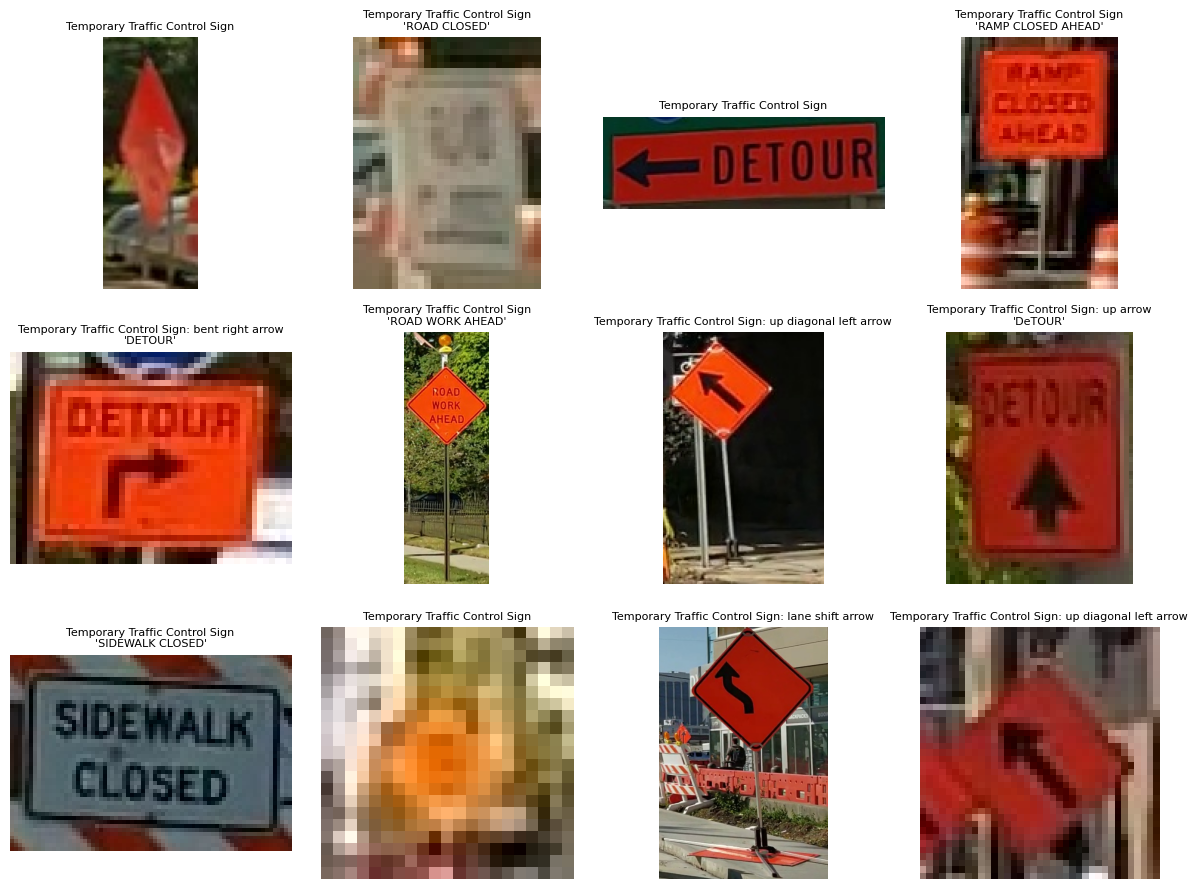

In [11]:
import matplotlib.pyplot as plt
import math

def show_ttc_samples(samples, n=12):
    n = min(n, len(samples))
    cols = 4
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = axes.flatten()

    for i in range(n):
        s = samples[i]
        crop = crop_ttc_sign(s)
        ax = axes[i]
        ax.imshow(crop)
        title = s.category_name
        if s.sign_text:
            title += f"\n'{s.sign_text}'"
        ax.set_title(title, fontsize=8)
        ax.axis("off")

    # hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

show_ttc_samples(ttc_samples, n=12)


In [12]:
# keep only signs that actually have text
ttc_with_text = [s for s in ttc_samples if s.sign_text]
len(ttc_with_text)

2721

In [13]:
speed_samples = [
    s for s in ttc_with_text
    if any(ch.isdigit() for ch in s.sign_text)
]

len(speed_samples), {s.sign_text for s in speed_samples}

(151,
 {'07/19 - 07/25 ENTRANCE CLOSED PROCEED TO ENTRANCE ON GILKESON ROAD',
  '10 MPH CMC',
  '19 ROAD WORK DELAYS LIKELY',
  '19TH AVE',
  '2 RIGHT LANES CLOSED AHEAD',
  '24TH ST',
  '6TH ST',
  '7TH AVE',
  '88 ROAD WORK BEGINS 7 - M - 21',
  '8TH ST',
  '9TH ST BRIDGE',
  '9TH ST BRIDGE CLOSED FOLLOW DETOUR',
  'CLEARANCE 14 FT - 6 IN',
  'CROSSOVER 500 FEET',
  'DETOUR 1/2 MILE',
  'DETOUR 1000 FT',
  'DETOUR 1500 FT',
  'EMERGENCY PULL-OFF 1/4 MILE',
  'EXIT 48',
  'EXIT 6 SOUTH 8 HIGHLAND PK BR ASPINWALL LEFT LANE EXIT ONLY',
  'FIFTH AVE CONSTRUCTION APRIL 2021 TO FALL 2022 THROUGH TRAFFIC USE ALTERNATE ROUTE',
  'JEROME STREET BRIDGE CLOSED 3 - 31 - 2021',
  'LANES SHIFT 1/2 MILE',
  'LANES SHIFT 1000 FT',
  'LANES SHIFT 1500 FT',
  'LANES SHIFTS 1000 FT',
  'LEFT LANE NO EXIT NEXT 5 MILES',
  'MCARDLE ROAD CLOSED FOR CONSTRUCTION 6-7-2021',
  'NWIX ST AND BERTY AVE 0AD WORK 22 - 2020',
  'RAMP CLOSED 1500 FT',
  'RAMP CLOSED 500 FT',
  'RAMP TO EAST 376 CLOSED FOLLOW DETOUR

In [17]:
import torch
import open_clip
from tqdm import tqdm
import random
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model, _, preprocess = open_clip.create_model_and_transforms(
    "ViT-B-16", pretrained="openai"
)
tokenizer = open_clip.get_tokenizer("ViT-B-16")
model.to(device)
model.eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

In [18]:
# maybe restrict to the top K most frequent texts
K = 50
text_counts = Counter(s.sign_text for s in ttc_with_text)
most_common_texts = [t for t, _ in text_counts.most_common(K)]
print(len(most_common_texts), most_common_texts[:10])

# tokenize and embed text prompts once
with torch.no_grad():
    text_tokens = tokenizer(most_common_texts).to(device)
    text_emb = model.encode_text(text_tokens)
    text_emb /= text_emb.norm(dim=-1, keepdim=True)

50 ['DETOUR', 'ROAD CLOSED', 'ROAD WORK AHEAD', 'SIDEWALK CLOSED', 'LANE CLOSED', 'WORK ZONE', 'SLOW', 'TRUCK DETOUR', 'DETOUR AHEAD', 'RIGHT LANE CLOSED AHEAD']


In [19]:
def clip_eval_on_ttc(samples, num_eval=300):
    # restrict to signs whose text is in the vocabulary
    samples = [s for s in samples if s.sign_text in most_common_texts]
    samples = random.sample(samples, min(num_eval, len(samples)))

    correct = 0
    total = 0

    for s in tqdm(samples, desc="Evaluating CLIP on TTC signs"):
        crop = crop_ttc_sign(s)
        img_tensor = preprocess(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            img_emb = model.encode_image(img_tensor)
            img_emb /= img_emb.norm(dim=-1, keepdim=True)
            sim = (img_emb @ text_emb.T).squeeze(0)
            pred_idx = sim.argmax().item()

        pred_text = most_common_texts[pred_idx]
        total += 1
        if pred_text == s.sign_text:
            correct += 1

    acc = correct / total if total > 0 else 0.0
    print(f"\nTop {K} text classes, CLIP accuracy: {acc:.3f} over {total} signs")


In [20]:
clip_eval_on_ttc(ttc_with_text, num_eval=300)

Evaluating CLIP on TTC signs: 100%|██████████| 300/300 [00:28<00:00, 10.35it/s]


Top 50 text classes, CLIP accuracy: 0.690 over 300 signs


In [21]:
import re
from collections import defaultdict

speed_samples = []          # list of (TTCSample, speed_value)
for s in ttc_with_text:
    m = re.search(r"SPEED LIMIT\s+(\d+)", s.sign_text)
    if m:
        speed = int(m.group(1))
        speed_samples.append((s, speed))

len(speed_samples), sorted({sp for _, sp in speed_samples})

(22, [45])

In [22]:
speed_counts = defaultdict(int)
for _, sp in speed_samples:
    speed_counts[sp] += 1

print("Speed limit distribution:")
for sp, cnt in sorted(speed_counts.items()):
    print(f"{sp:3d} mph : {cnt} samples")

Speed limit distribution:
 45 mph : 22 samples


In [23]:
unique_speeds = sorted(speed_counts.keys())
speed_prompts = [
    f"a temporary work zone speed limit sign showing {sp} miles per hour"
    for sp in unique_speeds
]

with torch.no_grad():
    speed_tokens = tokenizer(speed_prompts).to(device)
    speed_text_emb = model.encode_text(speed_tokens)
    speed_text_emb /= speed_text_emb.norm(dim=-1, keepdim=True)

In [ ]:
from tqdm import tqdm
import random

def clip_eval_speed_limits(speed_samples, num_eval=200):
    if not speed_samples:
        print("No speed samples found")
        return

    samples = random.sample(speed_samples, min(num_eval, len(speed_samples)))

    correct = 0
    total = 0

    for s, gt_speed in tqdm(samples, desc="Evaluating CLIP on speed limit signs"):
        crop = crop_ttc_sign(s)
        img_tensor = preprocess(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            img_emb = model.encode_image(img_tensor)
            img_emb /= img_emb.norm(dim=-1, keepdim=True)
            sim = (img_emb @ speed_text_emb.T).squeeze(0)
            pred_idx = sim.argmax().item()

        pred_speed = unique_speeds[pred_idx]
        total += 1
        if pred_speed == gt_speed:
            correct += 1

    acc = correct / total if total > 0 else 0.0
    print(f"\nSpeed limit CLIP accuracy: {acc:.3f} over {total} samples")
    return acc

clip_eval_speed_limits(speed_samples, num_eval=100)


Evaluating CLIP on speed limit signs: 100%|██████████| 22/22 [00:02<00:00,  9.42it/s]


Speed limit CLIP accuracy: 1.000 over 22 samples


1.0

: 